In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df=pd.read_csv("Data/sales.csv",parse_dates=["Order Date"])

In [13]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-08-11,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-08-11,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-12-06,16-06-2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-11-10,18-10-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-11-10,18-10-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [14]:
df=df[["Order Date","Sales"]]

In [15]:
df.head()

,Order Date,Sales
0,2016-08-11,261.9600
1,2016-08-11,731.9400
2,2016-12-06,14.6200
3,2015-11-10,957.5775
4,2015-11-10,22.3680


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Order Date  9994 non-null   datetime64[ns]
 1   Sales       9994 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 156.3 KB


<AxesSubplot:xlabel='Order Date'>

<Figure size 1440x720 with 0 Axes>

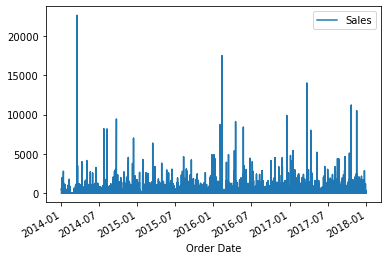

In [20]:
df.plot(x="Order Date",y="Sales")

In [22]:
from statsmodels.tsa.stattools import adfuller

In [23]:
result=adfuller(df['Sales'])

In [24]:
if result[1] <= 0.05:
    print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
else:
    print("weak evidence against null hypothesis,indicating it is non-stationary ")

strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


Let’s try to see the first difference and seasonal difference:

In [25]:
df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1)
df['Seasonal First Difference']=df['Sales']-df['Sales'].shift(12)
df.head()

,Order Date,Sales,Sales First Difference,Seasonal First Difference
0,2016-08-11,261.9600,NaN,NaN
1,2016-08-11,731.9400,469.9800,NaN
2,2016-12-06,14.6200,-717.3200,NaN
3,2015-11-10,957.5775,942.9575,NaN
4,2015-11-10,22.3680,-935.2095,NaN


In [28]:
result1=adfuller(df['Sales First Difference'].dropna())

In [31]:
if result1[1] <= 0.05:
    print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
else:
    print("weak evidence against null hypothesis,indicating it is non-stationary ")

strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


In [32]:
result2=adfuller(df['Seasonal First Difference'].dropna())

In [33]:
if result2[1] <= 0.05:
    print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
else:
    print("weak evidence against null hypothesis,indicating it is non-stationary ")

strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


<AxesSubplot:>

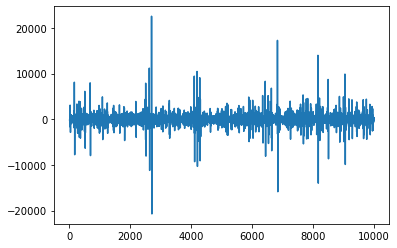

In [34]:
df['Seasonal First Difference'].plot()

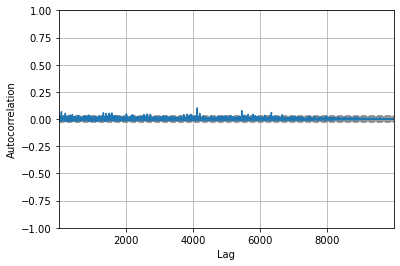

In [35]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Sales'])
plt.show()

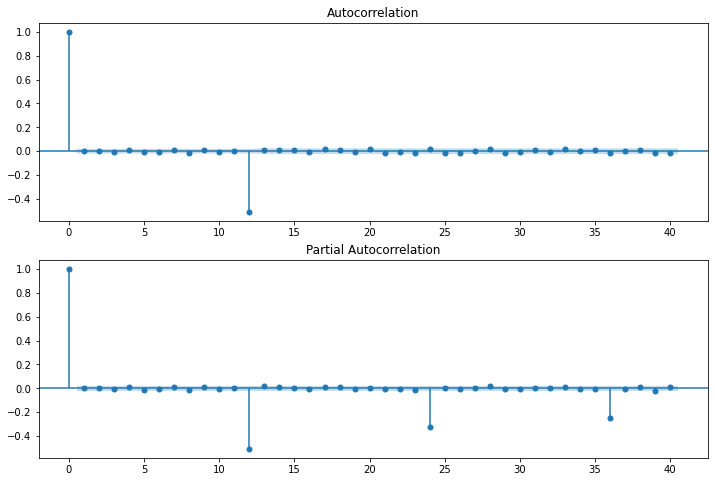

In [36]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].dropna(),lags=40,ax=ax2)

Each of these components are explicitly specified in the model as a parameter. A standard notation is used of ARIMA(p,d,q) where the parameters are substituted with integer values to quickly indicate the specific ARIMA model being used.

The parameters of the ARIMA model are defined as follows:

    p: The number of lag observations included in the model, also called the lag order.
    d: The number of times that the raw observations are differenced, also called the degree of differencing.
    q: The size of the moving average window, also called the order of moving average.


In [37]:
#p=1, d=1, q=0 or 1

from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(df['Sales'],order=(1,1,1))
model_fit=model.fit()
model_fit.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.AR

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                 9993
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -78488.165
Method:                       css-mle   S.D. of innovations            623.243
Date:                Wed, 07 Apr 2021   AIC                         156984.330
Time:                        10:04:24   BIC                         157013.168
Sample:                             1   HQIC                        156994.092
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0003      0.002     -0.135      0.892      -0.005       0.004
ar.L1.D.Sales     0.0071      0.010      0.707      0.480      -0.013       0.027
ma.L1.D.Sales    -1.0000      0.000  -3372.048      0.000      -1.001      -0.999
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          141.3990           +0.0000j          141.3990            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""